In [1]:
import os
import sys
dir_project = os.path.dirname(os.getcwd())
path = os.path.join(dir_project, 'src')
if path not in sys.path:
    sys.path.append(path)

current_directory = os.getcwd()
#os.chdir(os.path.join(dir_project, 'src'))
print("Current Working Directory:", os.getcwd())

Current Working Directory: c:\Users\nilsh\my_projects\SeqLP\jupyter_scripts


In [16]:
import pandas as pd
from seqlp.visualize.supervised_ml import DataPipeline

In [17]:
Data = DataPipeline(model = r"C:\Users\nilsh\my_projects\ExpoSeq\models\nanobody_full",
             path_seq_report = r"C:\Users\nilsh\my_projects\ExpoSeq\my_experiments\max_new\sequencing_report.csv",
             no_sequences = 1, 
             pca_components=30)

Some weights of EsmModel were not initialized from the model checkpoint at C:\Users\nilsh\my_projects\ExpoSeq\models\nanobody_full and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\nilsh\my_projects\SeqLP\src\seqlp\visualize\supervised_ml.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sequencing_report[['full_sequence', 'CDRPositions']] = sequencing_report.apply(ExtractData.calculate_cdr_positions, axis=1, result_type='expand')
c:\Users\nilsh\my_projects\SeqLP\src\seqlp\visualize\supervised_ml.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Explained variance after reducing to 30 dimensions:0.9888071417808533


In [18]:
sequencing_report = Data.init_sequencing_report
sequencing_report["v_gene"] = sequencing_report['allDHitsWithScore'].str.split('*').str[0]
experiments = sequencing_report["Experiment"].unique().tolist()
v_family = sequencing_report["v_gene"].tolist()


In [ ]:
print(Data.sequences_array.shape) # 150 sequences per group and 192 output dimensions from embedder

In [ ]:
from seqlp.visualize.tidy_protbert_embedding import TransformerBased 
results, reduced_dim = TransformerBased.do_umap(Data.sequences_array, n_neighbors=15, min_dist = 0.2, random_seed = 42, n_components=2, metric="euclidean")

In [ ]:
results["v_gene"] =  v_family
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
results["v_gene_encoded"] = le.fit_transform(results["v_gene"])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
# Get unique categories
categories = np.unique(results["v_gene_encoded"])

# Create a color map
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(categories)))

for i, category in enumerate(categories):
    # Create a boolean mask for the current category
    mask = results["v_gene_encoded"] == category

    # Plot the points for this category
    plt.scatter(results["UMAP_1"][mask], results["UMAP_2"][mask], color=colors[i], label=category, s=10)

plt.legend()
plt.show()

In [21]:
from seqlp.visualize.comparative_analysis import Pipeline

ImportError: cannot import name 'Pipeline' from 'seqlp.visualize.comparative_analysis' (c:\Users\nilsh\my_projects\SeqLP\src\seqlp\visualize\comparative_analysis.py)

,Unnamed: 0,cloneId,readCount,readFraction,targetSequences,targetQualities,allVHitsWithScore,allDHitsWithScore,allJHitsWithScore,allCHitsWithScore,...,minQualFR4,aaSeqCDR1,aaSeqFR2,aaSeqCDR2,aaSeqFR3,aaSeqCDR3,aaSeqFR4,refPoints,Experiment,v_gene
0,0,0,177723.0,0.181298,GGAAGCATCGGCGCTATCCACGCCATGGGCTGGTTCCGCCAGGCTC...,HHHHHHHHHGGGGGGGGHHHHGGGGGHHHHHGGHHHHGGGGGHHHH...,IGHV3-23*00(416),"IGHD2-2*00(35),IGHD3-10*00(30),IGHD6-13*00(30)",IGHJ4*00(140.8),NaN,...,37,GSIGAIHA,MGWFRQAPGSQRELVAT,VTTTSDST,TYGESVKGRFTISREADKNTVFLQMSSLKPEDTAVYY,CNANSYCSESVCYENPWYDYW,GQGTQVTVSS_,:::::0:24:75:99:210:-8:213:243:-22:-2:250:263:...,cLNTX_bind,IGHD2-2


In [20]:
Pipe = Pipeline(model_path = r"C:\Users\nilsh\my_projects\ExpoSeq\models\nanobody_full")

Pipe.single_sequence(sequencing_report.head(1))

NameError: name 'Pipeline' is not defined

In [9]:
print(collection_array.shape)

(1, 101, 101)


<Axes: >

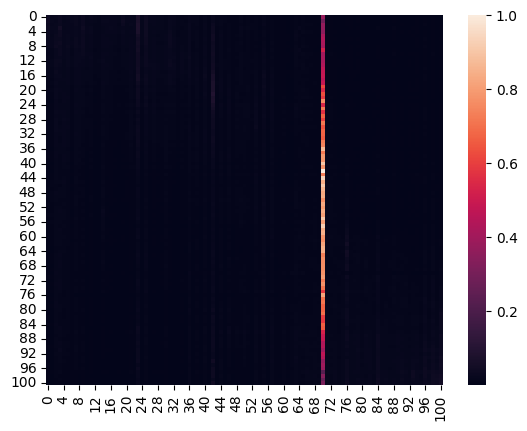

In [10]:
import seaborn as sns

sns.heatmap(collection_array[0, :, :], )

In [11]:
collection_array = run_pipeline(path_csv = r"C:\Users\nilsh\my_projects\ExpoSeq\my_experiments\max_new\sequencing_report.csv",
             number_sequences_per_group=1,
             muscle_path=r"C:\Users\nilsh\Downloads\muscle3.8.31_i86win32.exe",
             model_path = r"C:\Users\nilsh\my_projects\ExpoSeq\models\nanobody_full", )

Some weights of EsmModel were not initialized from the model checkpoint at C:\Users\nilsh\my_projects\ExpoSeq\models\nanobody_full and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\nilsh\my_projects\SeqLP\src\seqlp\visualize\comparative_analysis.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sequencing_report[['full_sequence', 'CDRPositions']] = sequencing_report.apply(self.calculate_cdr_positions, axis=1, result_type='expand')
c:\Users\nilsh\my_projects\SeqLP\src\seqlp\visualize\comparative_analysis.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

<Axes: >

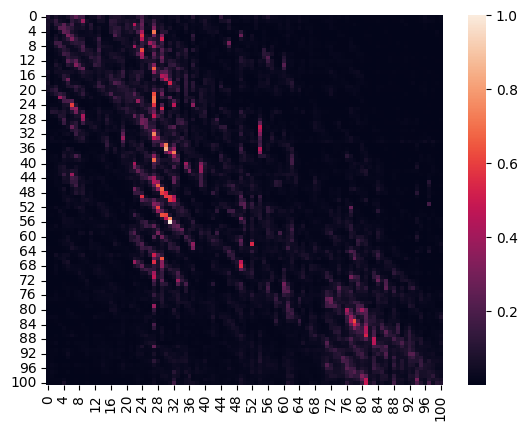

In [12]:
import seaborn as sns

sns.heatmap(collection_array[0, :, :], )